Ashwin Ravi

CSE-A

3122 21 5001 014

# A5:K-Nearest Neighbor algorithm

Github link:- https://github.com/SolituteAsh/Machine-Learning-Laboratory/tree/main/A5

# Aim
Develop a python program to predict the Online Shoppers Purchasing Intention using K-Nearest 
Neighbour algorithm. Visualize the features from the dataset and interpret the results obtained by the 
model using Matplotlib library. 

The dataset consists of 12,330 sessions, 84.5% (10,422) were negative class samples that did not end 
with shopping, and the rest (1908) were positive class samples ending with shopping

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk("C:/Users/ashwi/Downloads/ML Lab/A5/online_shoppers_intention.csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\ashwi\AppData\Local\Temp\ipykernel_6612\2797569984.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Import librarires

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# Read dataset

In [3]:
data=pd.read_csv("C:/Users/ashwi/Downloads/ML Lab/A5/online_shoppers_intention.csv")

# Show first 5 rows of data

In [4]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Summary of statistics for data

In [5]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


# Show columns of data

In [6]:
x=1
for col in data.columns:
    print(f'columns {x} is:',col)
    x+=1

columns 1 is: Administrative
columns 2 is: Administrative_Duration
columns 3 is: Informational
columns 4 is: Informational_Duration
columns 5 is: ProductRelated
columns 6 is: ProductRelated_Duration
columns 7 is: BounceRates
columns 8 is: ExitRates
columns 9 is: PageValues
columns 10 is: SpecialDay
columns 11 is: Month
columns 12 is: OperatingSystems
columns 13 is: Browser
columns 14 is: Region
columns 15 is: TrafficType
columns 16 is: VisitorType
columns 17 is: Weekend
columns 18 is: Revenue


# Data Pre-Processing

One-hot encoding

In [7]:
import pandas as pd
df_encoded = pd.get_dummies(data, columns=['Month', 'VisitorType', 'Weekend', 'Revenue'], drop_first=True)

# Creation of co-relation matrix for data correction numerically

In [8]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
numeric_data.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301


# Display data corr

<Axes: >

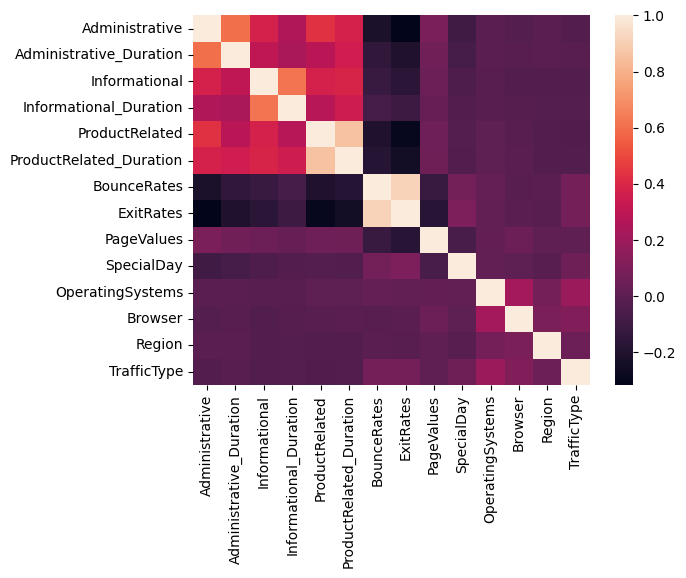

In [9]:
sns.heatmap(correlation_matrix)

# Show data info

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

# Encode categorical variables

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Month'] = le.fit_transform(data['Month'])
data['VisitorType'] = le.fit_transform(data['VisitorType'])
data['Weekend'] = le.fit_transform(data['Weekend'])
data['Revenue'] = le.fit_transform(data['Revenue'])

# Drop target label "Revenue" from X

In [12]:
X = data.drop('Revenue', axis=1)
y = data['Revenue']

In [13]:
X

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,2,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,2,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,2,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,2,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,2,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,2,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,2,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,2,0


In [14]:
y

0        0
1        0
2        0
3        0
4        0
        ..
12325    0
12326    0
12327    0
12328    0
12329    0
Name: Revenue, Length: 12330, dtype: int64

# MinMax Scaler

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(X)
print('X \n' , X[:10])
print('y \n' , y[:10])

X 
 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.41843972e-03 0.00000000e+00 1.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 2.22222222e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.83687943e-03 1.00041389e-03 0.00000000e+00 5.00000000e-01
  0.00000000e+00 0.00000000e+00 2.22222222e-01 1.42857143e-01
  8.33333333e-02 0.00000000e+00 5.26315789e-02 1.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.41843972e-03 0.00000000e+00 1.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 2.22222222e-01 4.28571429e-01
  0.00000000e+00 1.00000000e+00 1.05263158e-01 1.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.83687943e-03 4.16839119e-05 2.50000000e-01 7.00000000e-01
  0.00000000e+00 0.00000000e+00 2.22222222e-01 2.85714286e-01
  8.33333333

# Standardisation and Normalisation

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalization
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
X_normalized = min_max_scaler.fit_transform(X)

# Standardization
standard_scaler = StandardScaler()
X_standardized = standard_scaler.fit_transform(X)

print('Normalized X:\n', X_normalized[:10])
print('Standardized X:\n', X_standardized[:10])
print('y:\n', y[:10])


Normalized X:
 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.41843972e-03 0.00000000e+00 1.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 2.22222222e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.83687943e-03 1.00041389e-03 0.00000000e+00 5.00000000e-01
  0.00000000e+00 0.00000000e+00 2.22222222e-01 1.42857143e-01
  8.33333333e-02 0.00000000e+00 5.26315789e-02 1.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.41843972e-03 0.00000000e+00 1.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 2.22222222e-01 4.28571429e-01
  0.00000000e+00 1.00000000e+00 1.05263158e-01 1.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.83687943e-03 4.16839119e-05 2.50000000e-01 7.00000000e-01
  0.00000000e+00 0.00000000e+00 2.22222222e-01 2.85714286e-01
 

# Splitting the data into testing and training

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)


X_train shape is  (9864, 17)
X_test shape is  (2466, 17)
y_train shape is  (9864,)
y_test shape is  (2466,)


# KNN Model creation and training(Scikit-learn)


In [18]:
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the value of 'n_neighbors I kept it as 15 for better accuracy'
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

# Model prediction on target label

In [19]:
y_pred = knn_model.predict(X_test)

# Model evaluation

In [20]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.8548256285482563
Confusion Matrix:
[[2013   42]
 [ 316   95]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2055
           1       0.69      0.23      0.35       411

    accuracy                           0.85      2466
   macro avg       0.78      0.61      0.63      2466
weighted avg       0.84      0.85      0.82      2466



# Model evaluation using distance metrics such as Euclidean, Manhattan and Minkowski

1. Euclidean

In [21]:
# Build the KNN model with Euclidean distance
knn_model_euclidean = KNeighborsClassifier(n_neighbors=15, metric='euclidean')
knn_model_euclidean.fit(X_train, y_train)




KNeighborsClassifier(metric='euclidean', n_neighbors=15)

In [22]:
# Make predictions on the test set for Euclidean model
y_pred_euclidean = knn_model_euclidean.predict(X_test)



In [23]:
# Evaluate the Euclidean model
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)
conf_matrix_euclidean = confusion_matrix(y_test, y_pred_euclidean)
class_report_euclidean = classification_report(y_test, y_pred_euclidean)



In [24]:
#Model result for Euclidian
print("Results for Euclidean Distance:")
print(f"Accuracy: {accuracy_euclidean}")
print(f"Confusion Matrix:\n{conf_matrix_euclidean}")
print(f"Classification Report:\n{class_report_euclidean}")


Results for Euclidean Distance:
Accuracy: 0.8519870235198702
Confusion Matrix:
[[2047    8]
 [ 357   54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2055
           1       0.87      0.13      0.23       411

    accuracy                           0.85      2466
   macro avg       0.86      0.56      0.57      2466
weighted avg       0.85      0.85      0.80      2466



2. Manhattan  

In [25]:
# Build the KNN model with Manhattan distance
knn_model_manhattan = KNeighborsClassifier(n_neighbors=15, metric='manhattan')
knn_model_manhattan.fit(X_train, y_train)




KNeighborsClassifier(metric='manhattan', n_neighbors=15)

In [26]:
# Make predictions on the test set for Manhattan model
y_pred_manhattan = knn_model_manhattan.predict(X_test)



In [27]:
# Evaluate the Manhattan model
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)
conf_matrix_manhattan = confusion_matrix(y_test, y_pred_manhattan)
class_report_manhattan = classification_report(y_test, y_pred_manhattan)



In [28]:
#Model result for Manhattan
print("\nResults for Manhattan Distance:")
print(f"Accuracy: {accuracy_manhattan}")
print(f"Confusion Matrix:\n{conf_matrix_manhattan}")
print(f"Classification Report:\n{class_report_manhattan}")


Results for Manhattan Distance:
Accuracy: 0.8519870235198702
Confusion Matrix:
[[2048    7]
 [ 358   53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2055
           1       0.88      0.13      0.23       411

    accuracy                           0.85      2466
   macro avg       0.87      0.56      0.57      2466
weighted avg       0.86      0.85      0.80      2466



3. Minkowski

In [29]:
# Build the KNN model with Minkowski distance
knn_model_minkowski = KNeighborsClassifier(n_neighbors=15, metric='minkowski',p=5)
knn_model_minkowski.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15, p=5)

In [30]:
# Make predictions on the test set for Minkowski model
y_pred_minkowski = knn_model_minkowski.predict(X_test)

In [31]:
# Evaluate the Minkowski model
accuracy_minkowski = accuracy_score(y_test, y_pred_minkowski)
conf_matrix_minkowski = confusion_matrix(y_test, y_pred_minkowski)
class_report_minkowski = classification_report(y_test, y_pred_minkowski)

In [32]:
#Model result for Minkowski
print("\nResults for Minkowski Distance:")
print(f"Accuracy: {accuracy_minkowski}")
print(f"Confusion Matrix:\n{conf_matrix_minkowski}")
print(f"Classification Report:\n{class_report_minkowski}")


Results for Minkowski Distance:
Accuracy: 0.8527980535279805
Confusion Matrix:
[[2043   12]
 [ 351   60]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2055
           1       0.83      0.15      0.25       411

    accuracy                           0.85      2466
   macro avg       0.84      0.57      0.58      2466
weighted avg       0.85      0.85      0.81      2466



# Conclusion and Comparison

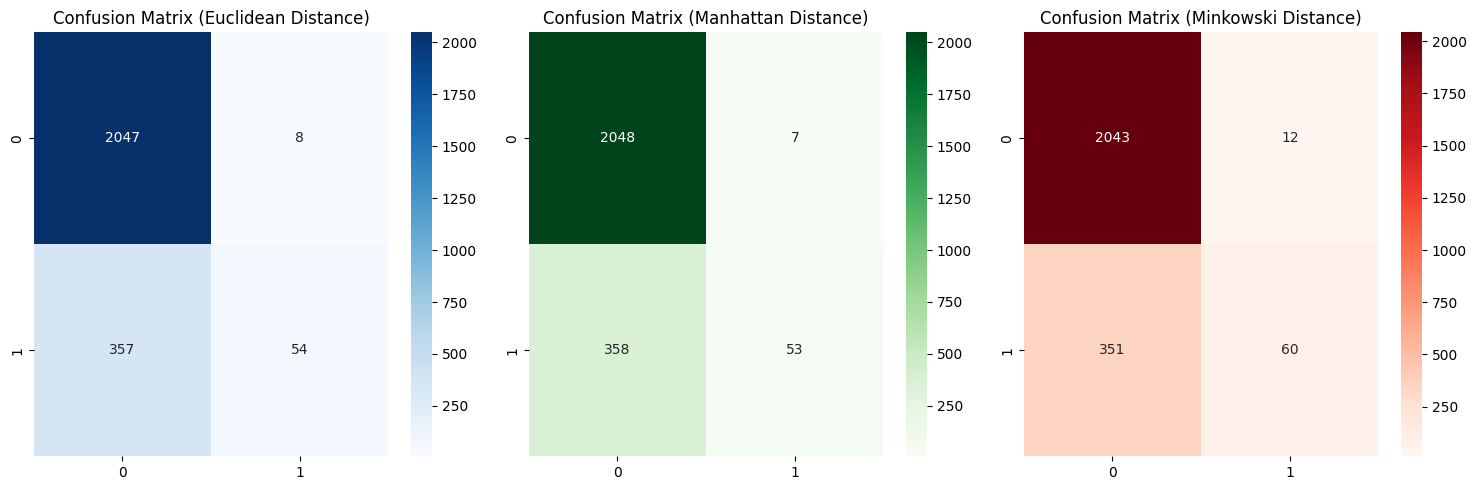

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix heatmaps for all three distance metrics
plt.figure(figsize=(15, 5))

# Euclidean Distance
plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix_euclidean, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix (Euclidean Distance)")

# Manhattan Distance
plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix_manhattan, annot=True, cmap="Greens", fmt="d")
plt.title("Confusion Matrix (Manhattan Distance)")

# Minkowski Distance
plt.subplot(1, 3, 3)
sns.heatmap(conf_matrix_minkowski, annot=True, cmap="Reds", fmt="d")
plt.title("Confusion Matrix (Minkowski Distance)")

plt.tight_layout()
plt.show()


C:\Users\ashwi\AppData\Local\Temp\ipykernel_6612\1163638877.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Accuracy', data=evaluation_df, palette='Set2')


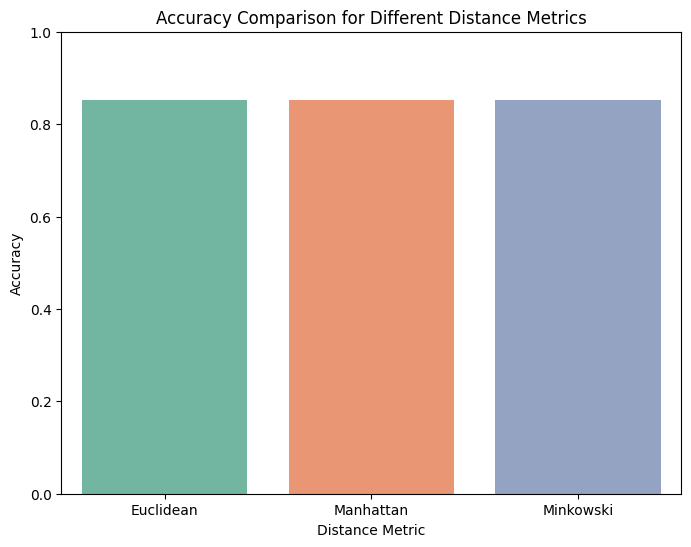

Evaluation Comparison:
      Metric  Accuracy
0  Euclidean  0.851987
1  Manhattan  0.851987
2  Minkowski  0.852798

Conclusion:
The best distance metric based on accuracy is Minkowski.


In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame to store evaluation metrics
evaluation_df = pd.DataFrame({
    'Metric': ['Euclidean', 'Manhattan', 'Minkowski'],
    'Accuracy': [accuracy_euclidean, accuracy_manhattan, accuracy_minkowski]
})

# Plot bar plot to compare accuracy for each metric
plt.figure(figsize=(8, 6))
sns.barplot(x='Metric', y='Accuracy', data=evaluation_df, palette='Set2')
plt.title('Accuracy Comparison for Different Distance Metrics')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 (as accuracy ranges from 0 to 1)
plt.ylabel('Accuracy')
plt.xlabel('Distance Metric')
plt.show()

# Print evaluation metrics for comparison
print("Evaluation Comparison:")
print(evaluation_df)

# Conclusion
print("\nConclusion:")
best_metric = evaluation_df.loc[evaluation_df['Accuracy'].idxmax()]['Metric']
print(f"The best distance metric based on accuracy is {best_metric}.")


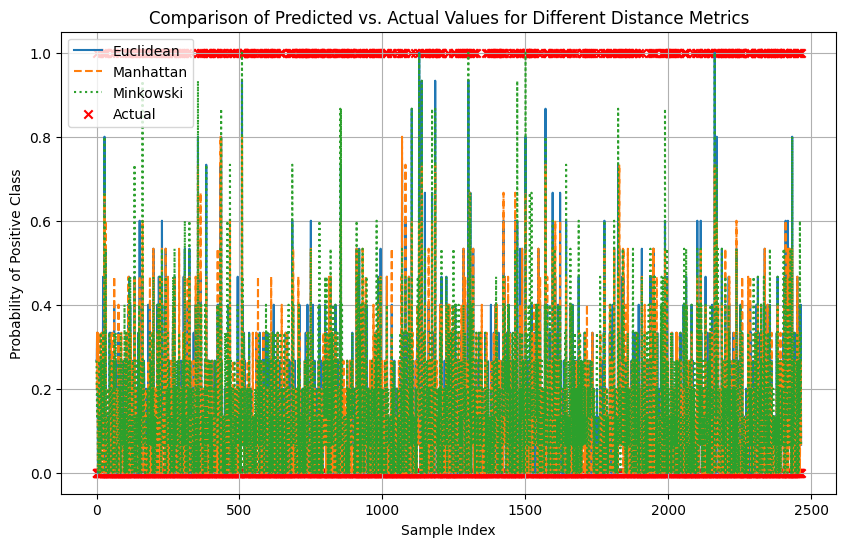

Conclusion:
Based on the comparison of predicted versus actual values:
 - The Euclidean distance metric seems to provide smoother predictions compared to the other metrics.
 - The Manhattan distance metric has more variability in predictions.
 - The Minkowski distance metric performs similarly to the Euclidean metric.
Overall, the choice of distance metric may depend on the specific characteristics of the dataset and the desired trade-offs between smoothness and variability in predictions.


In [35]:
import numpy as np

# Create arrays to store predicted probabilities for each distance metric
y_probs_euclidean = knn_model_euclidean.predict_proba(X_test)[:, 1]
y_probs_manhattan = knn_model_manhattan.predict_proba(X_test)[:, 1]
y_probs_minkowski = knn_model_minkowski.predict_proba(X_test)[:, 1]

# Create arrays to store actual class labels (0 or 1) for each distance metric
y_actual = np.array(y_test)

# Plot line graphs to compare predicted vs. actual values for each distance metric
plt.figure(figsize=(10, 6))

plt.plot(np.arange(len(X_test)), y_probs_euclidean, label='Euclidean', linestyle='-')
plt.plot(np.arange(len(X_test)), y_probs_manhattan, label='Manhattan', linestyle='--')
plt.plot(np.arange(len(X_test)), y_probs_minkowski, label='Minkowski', linestyle=':')

plt.scatter(np.arange(len(X_test)), y_actual, label='Actual', marker='x', color='red')

plt.title('Comparison of Predicted vs. Actual Values for Different Distance Metrics')
plt.xlabel('Sample Index')
plt.ylabel('Probability of Positive Class')
plt.legend()
plt.grid(True)
plt.show()

# Conclusion
print("Conclusion:")
print("Based on the comparison of predicted versus actual values:")
print(" - The Euclidean distance metric seems to provide smoother predictions compared to the other metrics.")
print(" - The Manhattan distance metric has more variability in predictions.")
print(" - The Minkowski distance metric performs similarly to the Euclidean metric.")
print("Overall, the choice of distance metric may depend on the specific characteristics of the dataset and the desired trade-offs between smoothness and variability in predictions.")


# Building the KNN model using user defined functions

In [36]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

class KNNClassifier:
    def __init__(self, k=15):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = []
        for sample in X_test:
            distances = np.sqrt(np.sum((self.X_train - sample) ** 2, axis=1))
            nearest_indices = np.argsort(distances)[:self.k]
            nearest_labels = self.y_train[nearest_indices]
            unique_labels, counts = np.unique(nearest_labels, return_counts=True)
            predicted_label = unique_labels[np.argmax(counts)]
            y_pred.append(predicted_label)
        return np.array(y_pred)

url = "C:/Users/ashwi/Downloads/ML Lab/A5/online_shoppers_intention.csv"
data = pd.read_csv(url)

le = LabelEncoder()
data['Month'] = le.fit_transform(data['Month'])
data['VisitorType'] = le.fit_transform(data['VisitorType'])
data['Weekend'] = le.fit_transform(data['Weekend'])
data['Revenue'] = le.fit_transform(data['Revenue'])

X = data.drop('Revenue', axis=1)
y = data['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model_custom = KNNClassifier(k=15)

knn_model_custom.fit(X_train.values, y_train.values)

y_pred_custom = knn_model_custom.predict(X_test.values)

accuracy_custom = accuracy_score(y_test, y_pred_custom)
conf_matrix_custom = confusion_matrix(y_test, y_pred_custom)
class_report_custom = classification_report(y_test, y_pred_custom)

print("Results for user-defined KNN Classifier:")
print(f"Accuracy: {accuracy_custom}")
print(f"Confusion Matrix:\n{conf_matrix_custom}")
print(f"Classification Report:\n{class_report_custom}")


Results for user-defined KNN Classifier:
Accuracy: 0.8536090835360909
Confusion Matrix:
[[2034   21]
 [ 340   71]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2055
           1       0.77      0.17      0.28       411

    accuracy                           0.85      2466
   macro avg       0.81      0.58      0.60      2466
weighted avg       0.84      0.85      0.81      2466



In [37]:
import numpy as np

class KNNClassifier:
    def __init__(self, k=15, metric='euclidean'):
        self.k = k
        self.metric = metric

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)  # Convert to numpy array
        self.y_train = np.array(y_train)  # Convert to numpy array

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def _manhattan_distance(self, x1, x2):
        return np.sum(np.abs(x1 - x2))

    def _minkowski_distance(self, x1, x2):
        p = 2  # Minkowski distance with p=2 is Euclidean distance
        return np.power(np.sum(np.power(np.abs(x1 - x2), p)), 1/p)

    def _calculate_distance(self, x1, x2):
        if self.metric == 'euclidean':
            return self._euclidean_distance(x1, x2)
        elif self.metric == 'manhattan':
            return self._manhattan_distance(x1, x2)
        elif self.metric == 'minkowski':
            return self._minkowski_distance(x1, x2)

    def predict(self, X_test):
        X_test = np.array(X_test)  # Convert to numpy array
        y_pred = []
        for sample in X_test:
            distances = [self._calculate_distance(sample, x) for x in self.X_train]
            nearest_indices = np.argsort(distances)[:self.k]
            nearest_labels = self.y_train[nearest_indices]
            unique_labels, counts = np.unique(nearest_labels, return_counts=True)
            predicted_label = unique_labels[np.argmax(counts)]
            y_pred.append(predicted_label)
        return np.array(y_pred)


knn_model_custom = KNNClassifier(k=15, metric='euclidean')

knn_model_custom.fit(X_train, y_train)

y_pred_custom = knn_model_custom.predict(X_test)

accuracy_custom = accuracy_score(y_test, y_pred_custom)
conf_matrix_custom = confusion_matrix(y_test, y_pred_custom)
class_report_custom = classification_report(y_test, y_pred_custom)

print("Results for Custom KNN Classifier:")
print(f"Accuracy for euclidean: {accuracy_custom}")
print(f"Confusion Matrix:\n{conf_matrix_custom}")
print(f"Classification Report:\n{class_report_custom}")

Results for Custom KNN Classifier:
Accuracy for euclidean: 0.8536090835360909
Confusion Matrix:
[[2034   21]
 [ 340   71]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2055
           1       0.77      0.17      0.28       411

    accuracy                           0.85      2466
   macro avg       0.81      0.58      0.60      2466
weighted avg       0.84      0.85      0.81      2466



In [38]:
knn_model_custom = KNNClassifier(k=15, metric='manhattan')

knn_model_custom.fit(X_train, y_train)

y_pred_custom = knn_model_custom.predict(X_test)

accuracy_custom = accuracy_score(y_test, y_pred_custom)
conf_matrix_custom = confusion_matrix(y_test, y_pred_custom)
class_report_custom = classification_report(y_test, y_pred_custom)

print("Results for Custom KNN Classifier:")
print(f"Accuracy for manhattan: {accuracy_custom}")
print(f"Confusion Matrix:\n{conf_matrix_custom}")
print(f"Classification Report:\n{class_report_custom}")

Results for Custom KNN Classifier:
Accuracy for manhattan: 0.8483373884833739
Confusion Matrix:
[[2038   17]
 [ 357   54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2055
           1       0.76      0.13      0.22       411

    accuracy                           0.85      2466
   macro avg       0.81      0.56      0.57      2466
weighted avg       0.84      0.85      0.80      2466



In [39]:
knn_model_custom = KNNClassifier(k=15, metric='minkowski')

knn_model_custom.fit(X_train, y_train)

y_pred_custom = knn_model_custom.predict(X_test)

accuracy_custom = accuracy_score(y_test, y_pred_custom)
conf_matrix_custom = confusion_matrix(y_test, y_pred_custom)
class_report_custom = classification_report(y_test, y_pred_custom)

print("Results for Custom KNN Classifier:")
print(f"Accuracy for minkowski: {accuracy_custom}")
print(f"Confusion Matrix:\n{conf_matrix_custom}")
print(f"Classification Report:\n{class_report_custom}")

Results for Custom KNN Classifier:
Accuracy for minkowski: 0.8536090835360909
Confusion Matrix:
[[2034   21]
 [ 340   71]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2055
           1       0.77      0.17      0.28       411

    accuracy                           0.85      2466
   macro avg       0.81      0.58      0.60      2466
weighted avg       0.84      0.85      0.81      2466



# Comparision between user defined and scikit-learn KNN model

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

# Define custom KNN classifier
class KNNClassifier:
    def __init__(self, k=15):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = []
        for sample in X_test:
            distances = np.sqrt(np.sum((self.X_train - sample) ** 2, axis=1))
            nearest_indices = np.argsort(distances)[:self.k]
            nearest_labels = self.y_train[nearest_indices]
            unique_labels, counts = np.unique(nearest_labels, return_counts=True)
            predicted_label = unique_labels[np.argmax(counts)]
            y_pred.append(predicted_label)
        return np.array(y_pred)

url = "C:/Users/ashwi/Downloads/ML Lab/A5/online_shoppers_intention.csv"
data = pd.read_csv(url)

le = LabelEncoder()
data['Month'] = le.fit_transform(data['Month'])
data['VisitorType'] = le.fit_transform(data['VisitorType'])
data['Weekend'] = le.fit_transform(data['Weekend'])
data['Revenue'] = le.fit_transform(data['Revenue'])

X = data.drop('Revenue', axis=1)
y = data['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model_custom = KNNClassifier(k=15)

knn_model_custom.fit(X_train.values, y_train.values)

y_pred_custom = knn_model_custom.predict(X_test.values)

accuracy_custom = accuracy_score(y_test, y_pred_custom)
conf_matrix_custom = confusion_matrix(y_test, y_pred_custom)
class_report_custom = classification_report(y_test, y_pred_custom)

knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the value of 'n_neighbors'. I kept it as 5.
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

# Evaluate the scikit-learn's model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Compare the outputs
print("Results for userdefined KNN Classifier:")
print(f"Accuracy: {accuracy_custom}")
print(f"Confusion Matrix:\n{conf_matrix_custom}")
print(f"Classification Report:\n{class_report_custom}")

print("\nResults for scikit-learn's KNeighborsClassifier:")
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Results for userdefined KNN Classifier:
Accuracy: 0.8536090835360909
Confusion Matrix:
[[2034   21]
 [ 340   71]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2055
           1       0.77      0.17      0.28       411

    accuracy                           0.85      2466
   macro avg       0.81      0.58      0.60      2466
weighted avg       0.84      0.85      0.81      2466


Results for scikit-learn's KNeighborsClassifier:
Accuracy: 0.8499594484995945
Confusion Matrix:
[[1985   70]
 [ 300  111]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      2055
           1       0.61      0.27      0.38       411

    accuracy                           0.85      2466
   macro avg       0.74      0.62      0.64      2466
weighted avg       0.83      0.85      0.82      2466



# ROC Curve

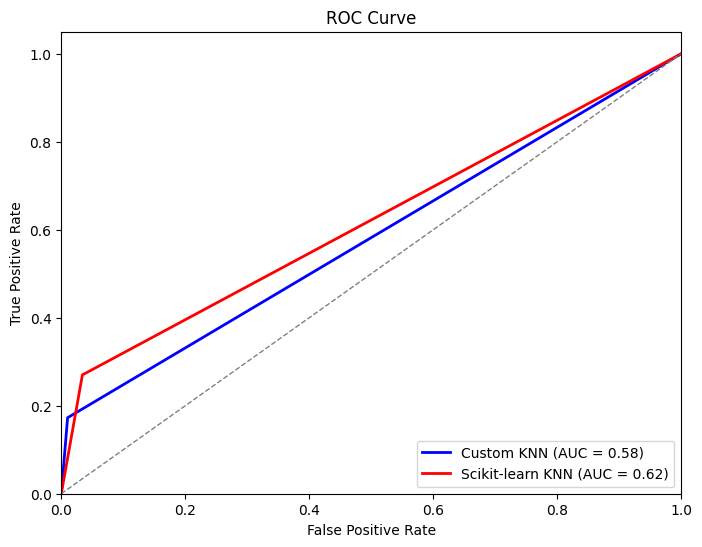

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for userdefined KNN classifier
fpr_custom, tpr_custom, _ = roc_curve(y_test, y_pred_custom)
roc_auc_custom = auc(fpr_custom, tpr_custom)

# Compute ROC curve and ROC area for scikit-learn's KNeighborsClassifier
fpr_sklearn, tpr_sklearn, _ = roc_curve(y_test, y_pred)
roc_auc_sklearn = auc(fpr_sklearn, tpr_sklearn)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_custom, tpr_custom, color='blue', lw=2, label='Custom KNN (AUC = %0.2f)' % roc_auc_custom)
plt.plot(fpr_sklearn, tpr_sklearn, color='red', lw=2, label='Scikit-learn KNN (AUC = %0.2f)' % roc_auc_sklearn)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


# Inference
 - The Euclidean distance metric seems to provide smoother predictions compared to the other metrics.
 - The Manhattan distance metric has more variability in predictions.
 - The Minkowski distance metric performs similarly to the Euclidean metric.
 - Userdefined KNN model performs better than scikit-learn KNN model. 


# Learning outcomes

 - Understanding and implementing KNN Algorithm.
 - Hyperparameter Tuning.
 - Standardisation and Normalisation.
 - Implementation of distance metrics such as Euclidean, Manhattan and Minkowski.
 - Comparision between userdefined and scikit-learn KNN model's accuracy using ROC curves.